In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AI/phishing data.csv")
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


Data Preprocessing

In [ ]:
print(df.info())
df.drop(labels=['id'],inplace=True,axis=1)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

Result: 
*   Phising website = 1
*   Legitimate = -1



In [ ]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import scipy.stats as ss
def cramers_v(x,y):
  conf_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(conf_matrix)[0]
  n = conf_matrix.sum().sum()
  phi2 = chi2/n
  r,k = conf_matrix.shape
  phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
print(cramers_v(df['having_IP_Address'],df['URL_Length']))

0.05298009962512562


In [ ]:
df_corr = []
for col in df.columns:
  val = []
  for col2 in df.columns:
    corr = cramers_v(df[col],df[col2])
    val.append(corr)
  df_corr.append(val)

print(df_corr)

[[0.9997993085096216, 0.05298009962512562, 0.4030844104178548, 0.15815332470322319, 0.39700915446036966, 0.0, 0.09983670598041199, 0.08814759704041321, 0.020432383665058933, 0.08626093544534756, 0.059954082220145255, 0.36316810491156126, 0.028009252524910714, 0.10848649310926872, 0.10683949325179798, 0.09890851825306374, 0.0771618090987427, 0.33616125471639513, 0.32075708798708363, 0.0832270516818605, 0.04133370779947702, 0.09617620657124253, 0.05352800342112883, 0.003833767664465004, 0.049626543006658155, 0.0, 0.09106479323375963, 0.027267612065800945, 0.41141574979454887, 0.01624983677389024, 0.0934899402784833], [0.05298009962512562, 1.0, 0.12128472710473363, 0.08823865493132624, 0.08347704593425968, 0.07243925844207827, 0.015349163924999973, 0.04759126410499223, 0.22723532358082962, 0.04223156138887892, 0.03187062333492252, 0.12653576900119126, 0.25204680017261655, 0.042115530454124195, 0.041233223633851464, 0.29746854728910926, 0.09611221201796166, 0.14732662736689425, 0.050888944

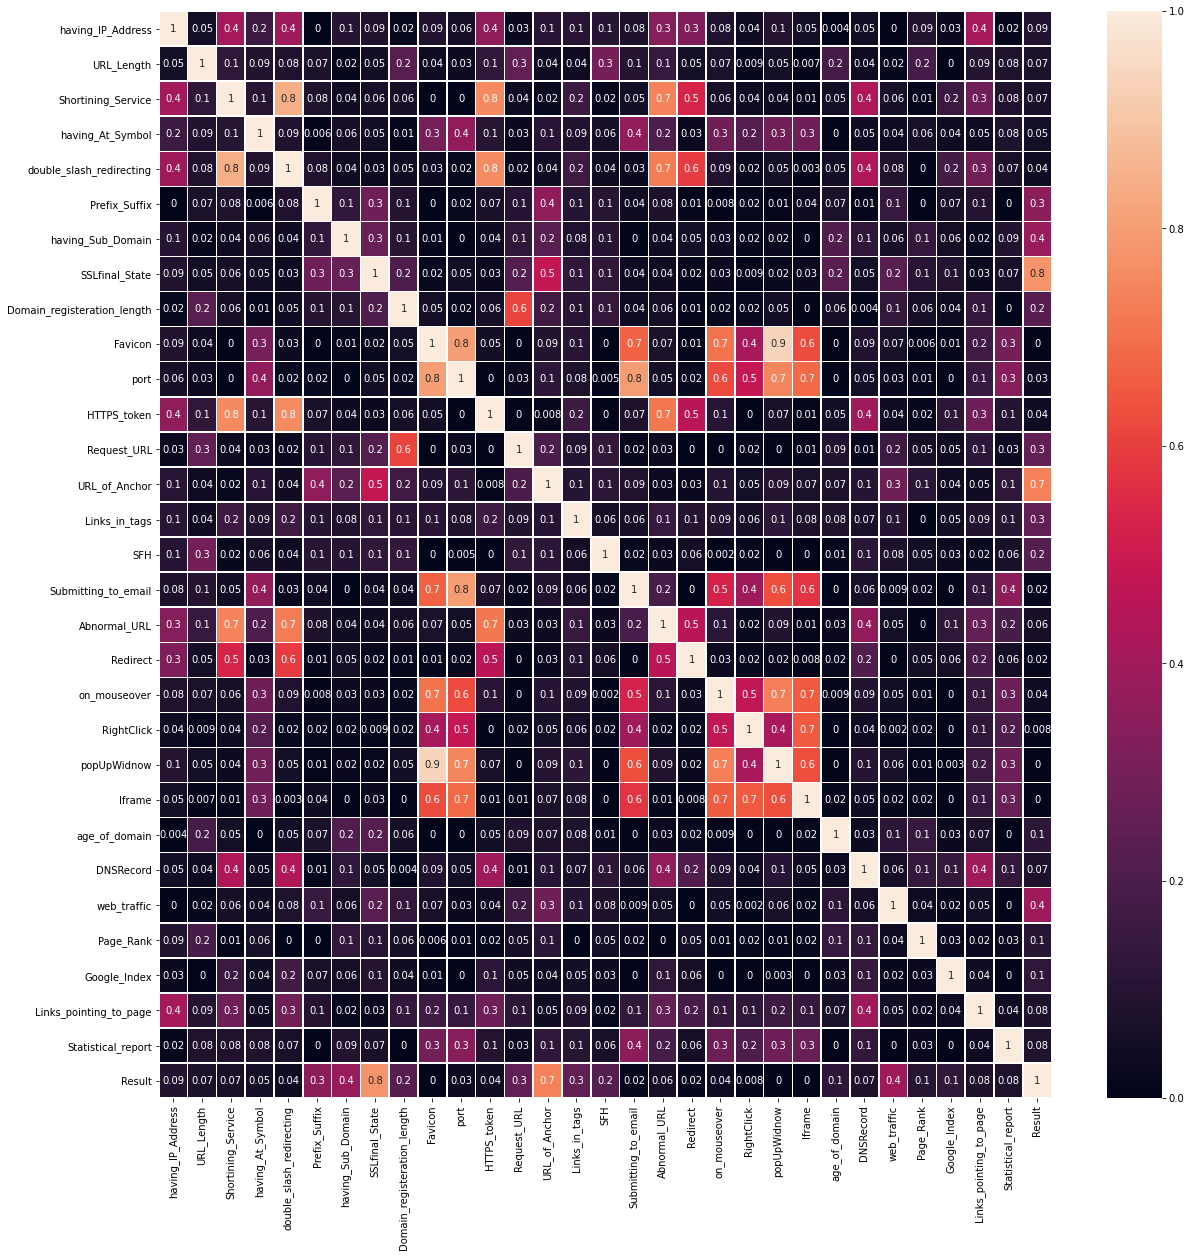

In [ ]:
matrix = np.array(df_corr)
cols = list(df.columns)
ax = sns.heatmap(matrix, linewidth=0.5, annot = True, fmt='.1g',xticklabels=cols,yticklabels=cols)
plt.show()

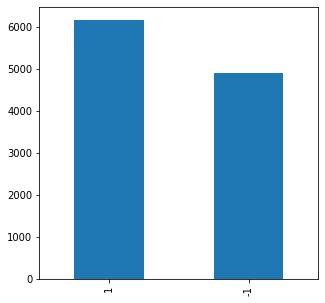

In [ ]:
plt.rcParams["figure.figsize"]=5,5
df['Result'].value_counts().plot(kind = 'bar')

Result
-1    AxesSubplot(0.125,0.125;0.227941x0.0639831)
 1    AxesSubplot(0.125,0.125;0.227941x0.0639831)
Name: Statistical_report, dtype: object

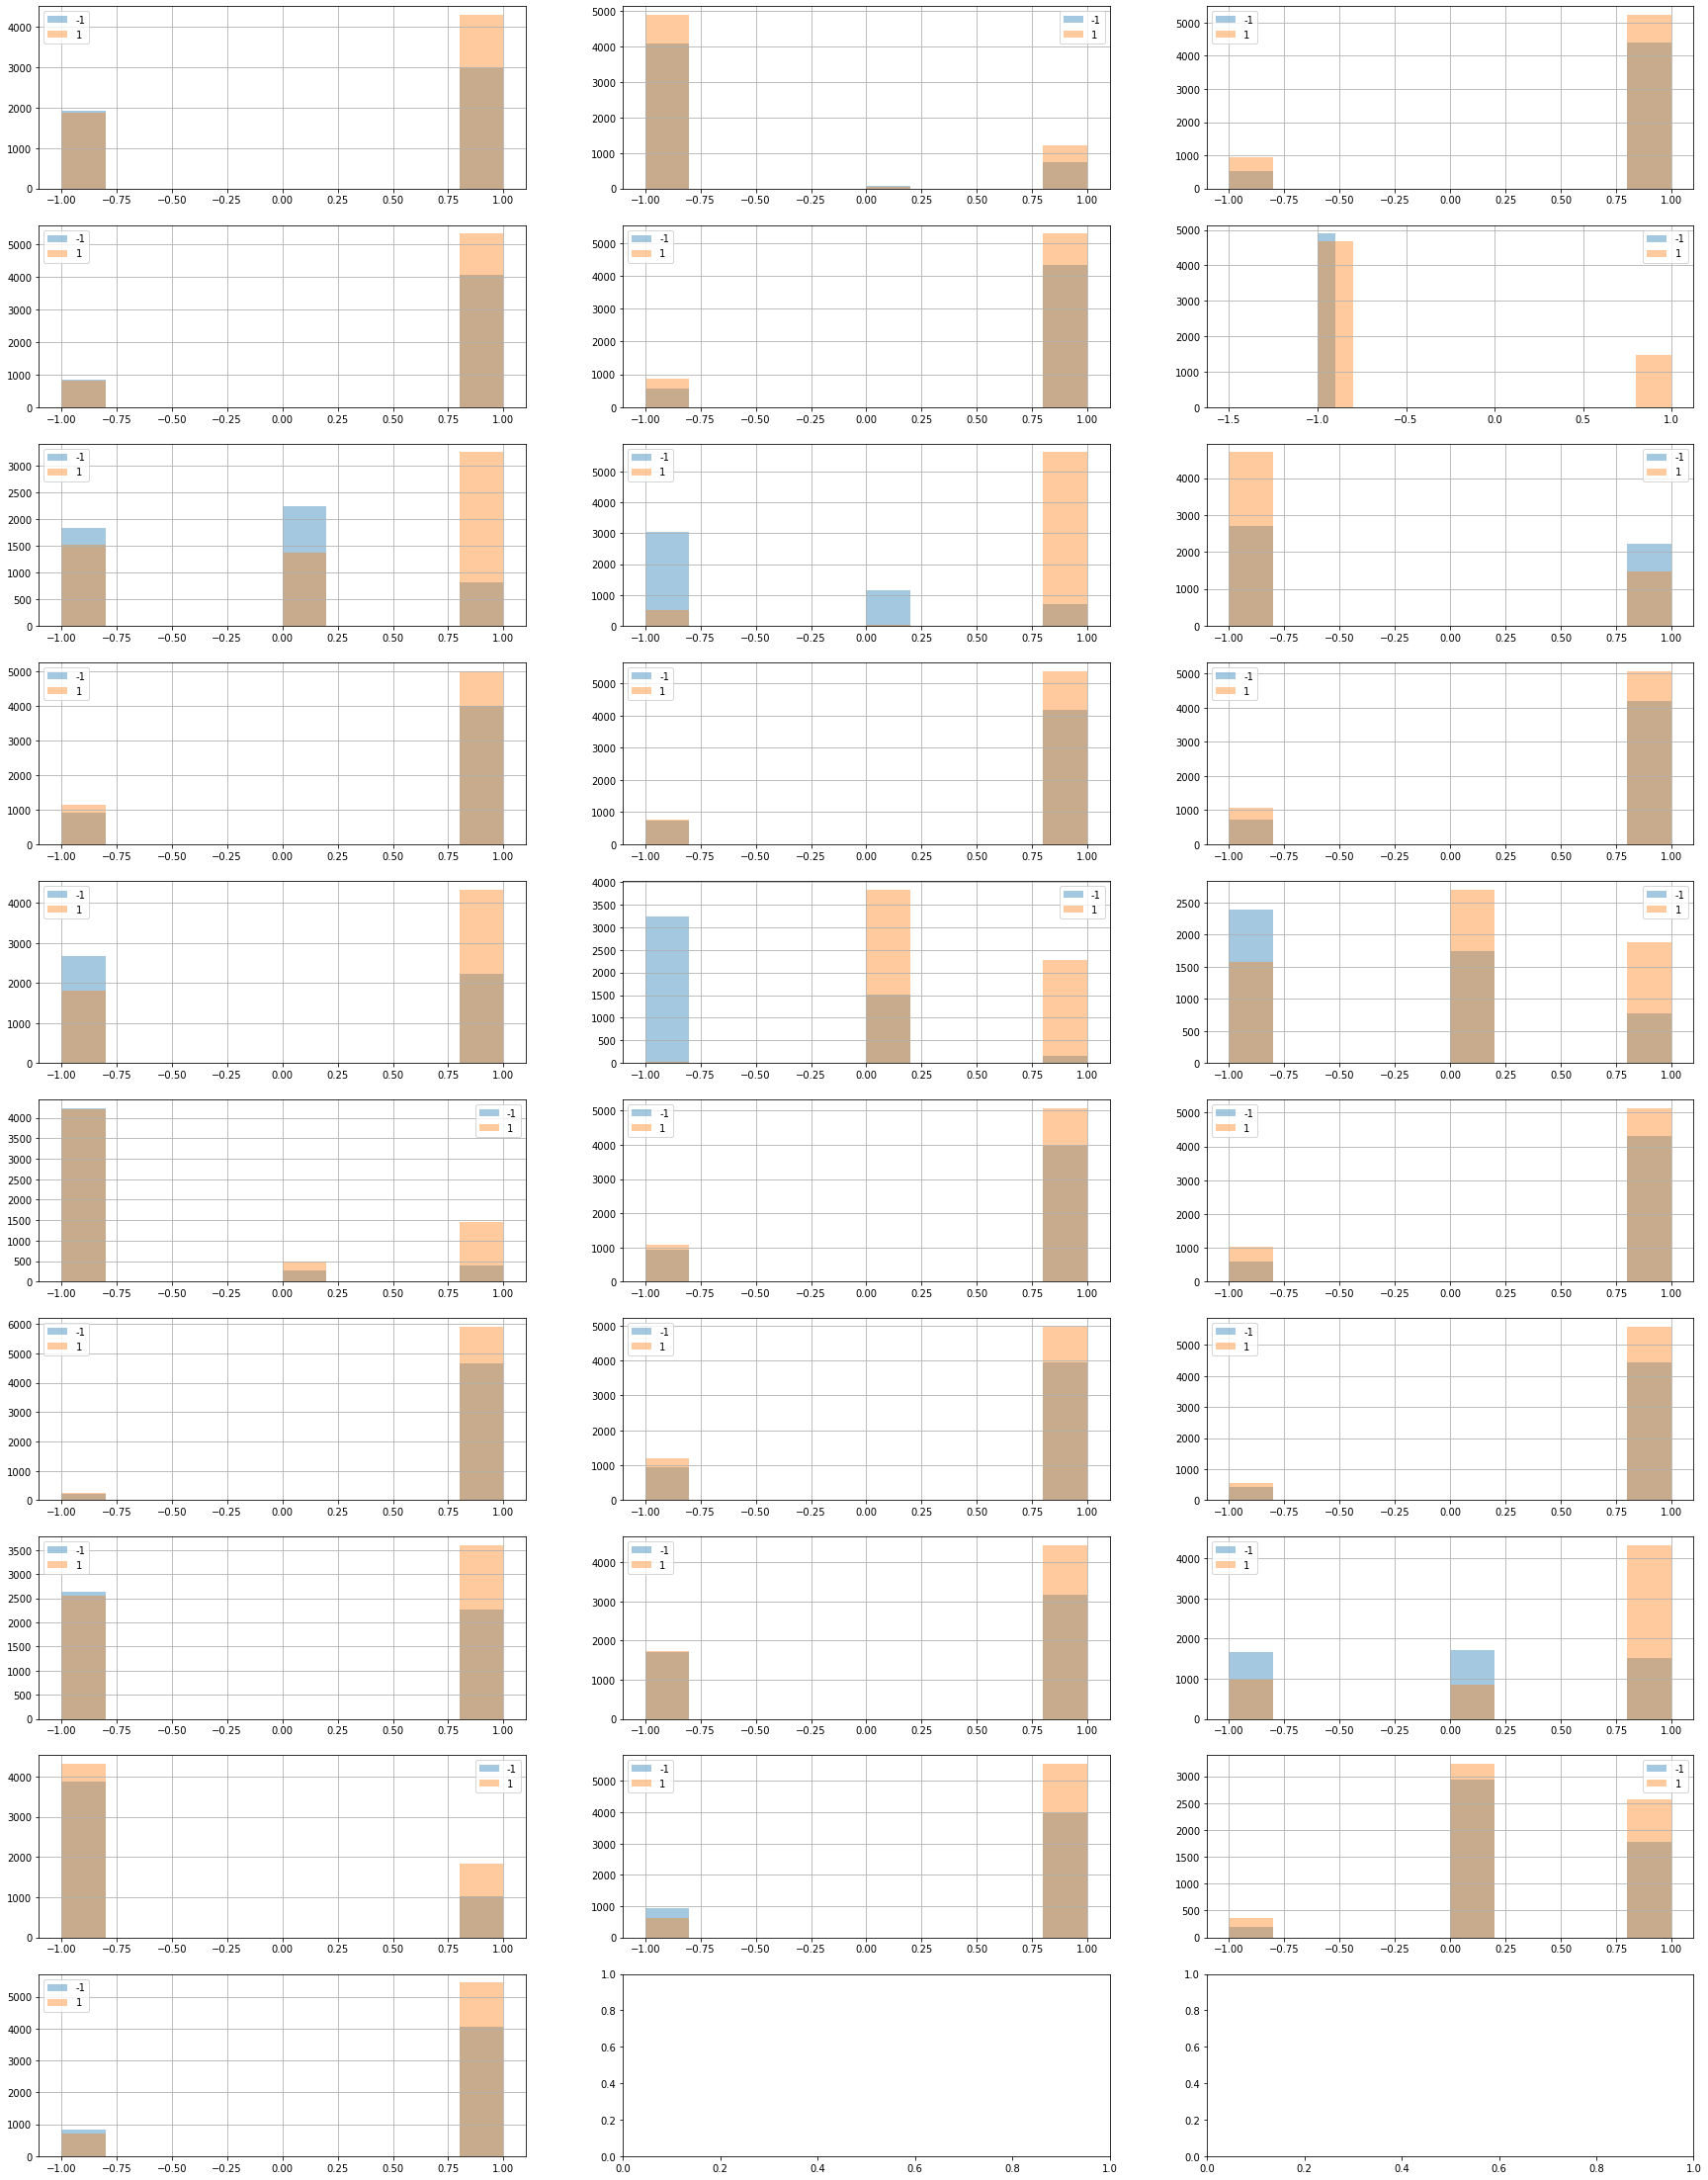

In [ ]:
#histogram
fig, axs = plt.subplots(10, 3, figsize=(30,40))
df.groupby("Result").having_IP_Address.hist(alpha=0.4, ax=axs[0, 0], legend=True)
df.groupby("Result").URL_Length.hist(alpha=0.4, ax=axs[0, 1], legend=True)
df.groupby("Result").Shortining_Service.hist(alpha=0.4, ax=axs[0, 2], legend=True)
df.groupby("Result").having_At_Symbol.hist(alpha=0.4, ax=axs[1, 0], legend=True)
df.groupby("Result").double_slash_redirecting.hist(alpha=0.4, ax=axs[1, 1], legend=True)
df.groupby("Result").Prefix_Suffix.hist(alpha=0.4, ax=axs[1, 2], legend=True)
df.groupby("Result").having_Sub_Domain.hist(alpha=0.4, ax=axs[2, 0], legend=True)
df.groupby("Result").SSLfinal_State.hist(alpha=0.4, ax=axs[2, 1], legend=True)
df.groupby("Result").Domain_registeration_length.hist(alpha=0.4, ax=axs[2, 2], legend=True)
df.groupby("Result").Favicon.hist(alpha=0.4, ax=axs[3,0], legend=True)
df.groupby("Result").port.hist(alpha=0.4, ax=axs[3,1], legend=True)
df.groupby("Result").HTTPS_token.hist(alpha=0.4, ax=axs[3, 2], legend=True)
df.groupby("Result").Request_URL.hist(alpha=0.4, ax=axs[4,0], legend=True)
df.groupby("Result").URL_of_Anchor.hist(alpha=0.4, ax=axs[4,1], legend=True)
df.groupby("Result").Links_in_tags.hist(alpha=0.4, ax=axs[4, 2], legend=True)
df.groupby("Result").SFH.hist(alpha=0.4, ax=axs[5,0], legend=True)
df.groupby("Result").Submitting_to_email.hist(alpha=0.4, ax=axs[5,1], legend=True)
df.groupby("Result").Abnormal_URL.hist(alpha=0.4, ax=axs[5, 2], legend=True)							
df.groupby("Result").RightClick.hist(alpha=0.4, ax=axs[6,0], legend=True)
df.groupby("Result").popUpWidnow.hist(alpha=0.4, ax=axs[6,1], legend=True)
df.groupby("Result").Iframe.hist(alpha=0.4, ax=axs[6,2], legend=True)
df.groupby("Result").age_of_domain.hist(alpha=0.4, ax=axs[7, 0], legend=True)
df.groupby("Result").DNSRecord.hist(alpha=0.4, ax=axs[7,1], legend=True)
df.groupby("Result").web_traffic.hist(alpha=0.4, ax=axs[7, 2], legend=True)
df.groupby("Result").Page_Rank.hist(alpha=0.4, ax=axs[8,0], legend=True)
df.groupby("Result").Google_Index.hist(alpha=0.4, ax=axs[8,1], legend=True)
df.groupby("Result").Links_pointing_to_page.hist(alpha=0.4, ax=axs[8, 2], legend=True)
df.groupby("Result").Statistical_report.hist(alpha=0.4, ax=axs[9,0], legend=True)


## Model Building

In [ ]:
X = df.iloc[:,0:30]
y = df.iloc[:,30:31]
X.head()
#y.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print(len(y_train))

7738


In [ ]:
y_test1=y_test

## k-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train.values.ravel())

knn_pred = knn_model.predict(X_test)

print('K-NN accuracy score = ',knn_model.score(X_test,y_test),'\n')

# using k-fold cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_model, X, y.values.ravel(), cv=5) # 5 fold
print('\n')
print(cv_scores,'\n')
print('cv_scores mean : {}'.format(np.mean(cv_scores)))

K-NN accuracy score =  0.9451311425987338 



[0.96336499 0.96110357 0.95658073 0.93034826 0.90863863] 

cv_scores mean : 0.94400723654455


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)
knn_gscv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best value for k = ',knn_gscv.best_params_)
print('\n The score for the best parameter = ',knn_gscv.best_score_)

Best value for k =  {'n_neighbors': 1}

 The score for the best parameter =  0.9497299933688443


In [ ]:
from sklearn import metrics 
tuned_model_knn = knn_gscv.fit(X_train,y_train.values.ravel())
tuned_predict = knn_gscv.predict(X_test)
tuned_predict = tuned_predict.tolist()

print("\nAccuracy:",metrics.accuracy_score(y_test, tuned_predict))


Accuracy: 0.9529695507989147


Feature extraction using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)

print(X_train_pca)
'''
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_pca)

X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

print(X_train_pca)
'''

[[ 0.72604158 -0.48095005  0.38965485 ... -2.45263379 -0.60097164
   0.40210376]
 [ 0.72604158 -0.48095005  0.38965485 ...  0.40772495 -0.60097164
  -2.48692029]
 [ 0.72604158 -0.48095005  0.38965485 ...  0.40772495 -2.35846165
   0.40210376]
 ...
 [-1.37733159 -0.48095005 -2.56637381 ... -2.45263379  1.15651837
   0.40210376]
 [-1.37733159  2.12247177 -2.56637381 ...  0.40772495  1.15651837
  -2.48692029]
 [ 0.72604158 -0.48095005  0.38965485 ...  0.40772495 -0.60097164
   0.40210376]]


'\nfrom sklearn.decomposition import PCA\n\npca = PCA(.95)\npca.fit(X_train_pca)\n\nX_train_pca = pca.transform(X_train_pca)\nX_test_pca = pca.transform(X_test_pca)\n\nprint(X_train_pca)\n'

## SVM

SVM - Linear kernel

In [ ]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='linear',probability=True) 

clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)
y_pred = y_pred.tolist()

print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.93186614410612
Precision: 0.9309031556039173
Recall: 0.945303867403315


In [ ]:
print(len(y_pred))
print(len(y_test))

3317
3317


SVM - RBF kernel

In [ ]:
clf_rbf = svm.SVC(kernel='rbf',probability=True) 

clf_rbf.fit(X_train, y_train.values.ravel())

y_pred_rbf = clf_rbf.predict(X_test)

print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))
print("Precision:",metrics.precision_score(y_test, y_pred_rbf))
print("Recall:",metrics.recall_score(y_test, y_pred_rbf,))


Accuracy: 0.9360868254446789
Precision: 0.9309435951502372
Recall: 0.9561451001624256


## Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000,activation='relu',solver='sgd')
mlp.fit(X_train_pca, y_train.values.ravel())
nn_prediction_sgd = mlp.predict(X_test_pca)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000,activation='relu',solver='adam')
mlp.fit(X_train_pca, y_train.values.ravel())
nn_prediction_adam = mlp.predict(X_test_pca)

Decision Tree

In [ ]:
from sklearn.metrics import auc
from sklearn import tree
from matplotlib.legend_handler import HandlerLine2D
import sklearn.metrics as metrics
import graphviz
from sklearn.metrics import roc_curve

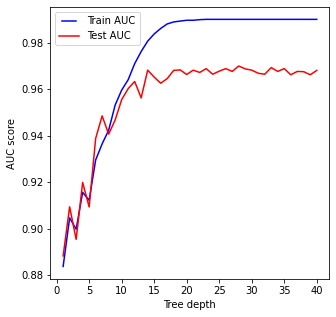

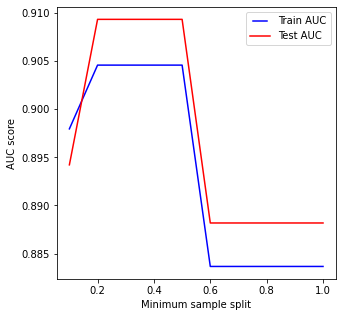

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.30)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.50)

y_valid_true=y_valid['Result'].to_list()
y_train_list=y_train['Result'].to_list()

max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_list, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_valid)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid_true, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
#max depth of 12 is taken for prediction

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

y_valid_true=y_valid['Result'].to_list()
y_train_list=y_train['Result'].to_list()
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_list, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_valid)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid_true, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Minimum sample split')
plt.show()
#min_sample_split of 40 percent is taken


In [ ]:
clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=12, min_samples_split=0.4)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_true=y_test['Result'].to_list()

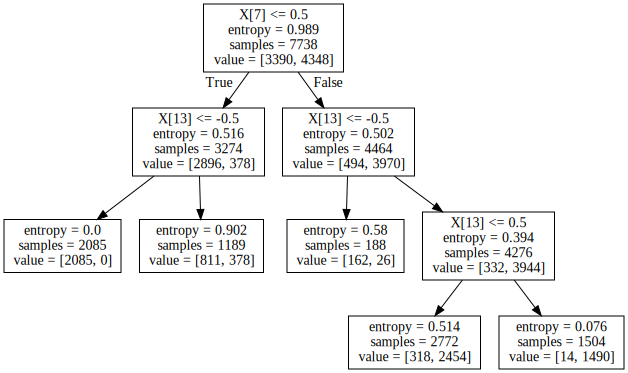

In [ ]:
dot_data=tree.export_graphviz(clf)
graph=graphviz.Source(dot_data, format="png") 
graph

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_true,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
print("AUC:", auc(false_positive_rate, true_positive_rate))
print("Report: ")
print(metrics.classification_report(y_true,y_pred))

Accuracy:  0.9101868595539482
AUC: 0.9092927679774951
Report: 
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       755
           1       0.92      0.92      0.92       904

    accuracy                           0.91      1659
   macro avg       0.91      0.91      0.91      1659
weighted avg       0.91      0.91      0.91      1659



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model=RandomForestClassifier()
y_train_list = y_train['Result'].to_list()

from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

rf_gscv = GridSearchCV(rf_model, param_grid, cv=5)
rf_gscv.fit(X_train, y_train_list)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('Best parameters ',rf_gscv.best_params_)
print('\nThe score for the best parameters = ',rf_gscv.best_score_)

rf_model = RandomForestClassifier(bootstrap=True, max_depth=40, min_samples_split=8, n_estimators=100)
rf_model.fit(X_train,y_train.values.ravel())

rf_pred = rf_model.predict(X_test)
y_true = y_test['Result'].to_list()

print("\nAccuracy: ",metrics.accuracy_score(y_true,rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred,))

Best parameters  {'bootstrap': True, 'max_depth': 30, 'min_samples_split': 8, 'n_estimators': 300}

The score for the best parameters =  0.9608426912804477

Accuracy:  0.9680530440024111
Precision: 0.9630032644178455
Recall: 0.9789823008849557


## Rotation Forest

In [ ]:
!pip install rotation-forest

  Created wheel for rotation-forest: filename=rotation_forest-1.0-cp37-none-any.whl size=7002 sha256=25ae6a2cf42b9a9400091e3e1e41b3a9de5c66ecd797dddef10a5fb1d1fe8cd3
  Stored in directory: /root/.cache/pip/wheels/14/f5/1f/448dd5568db358c4453948118076384c55f4fd223634803607
Successfully built rotation-forest


In [ ]:
import rotation_forest
#model=rotation_forest.RotationForestClassifier(n_estimators=10, criterion='entropy', rotation_algo='pca')

In [ ]:
'''
df = pd.read_csv("/content/drive/MyDrive/AI/phishing data.csv")
df.drop(labels=['id'],inplace=True,axis=1)
X = df.iloc[:,0:30]
y = df.iloc[:,30:31]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
'''

'\ndf = pd.read_csv("/content/drive/MyDrive/AI/phishing data.csv")\ndf.drop(labels=[\'id\'],inplace=True,axis=1)\nX = df.iloc[:,0:30]\ny = df.iloc[:,30:31]\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)\n'

In [ ]:
# rotf_model=rotation_forest.RotationForestClassifier(n_estimators=10, bootstrap=True, criterion='entropy', rotation_algo='pca')
# print(rotf_model.get_params())
# rotf_model.fit(X_train,y_train)
# y_train_list=y_train['Result'].to_list()
# y_pred=rotf_model.predict(X_test)
# y_true=y_test['Result'].to_list()
# print("Accuracy: ",metrics.accuracy_score(y_true,y_pred))
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
# print("AUC:", auc(false_positive_rate, true_positive_rate))
# print("Report: ")
# print(metrics.classification_report(y_true,y_pred))

In [ ]:
rotf_model = rotation_forest.RotationForestClassifier(n_estimators=10, bootstrap=True, criterion='entropy', rotation_algo='pca')
print(rotf_model.get_params())

rotf_model.fit(X_train,y_train)

y_train_list = y_train['Result'].to_list()

param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
rotf_gscv = GridSearchCV(rotf_model, param_grid, cv=5)
rotf_gscv.fit(X_train, y_train_list)

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_features_per_subset': 3, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'rotation_algo': 'pca', 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


GridSearchCV(cv=5, error_score=nan,
             estimator=RotationForestClassifier(bootstrap=True,
                                                class_weight=None,
                                                criterion='entropy',
                                                max_depth=None,
                                                max_features=1.0,
                                                max_leaf_nodes=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=10,
                                                n_features_per_subset=3,
                                                n_jobs=1, oob_score=False,
                                                random_state=None,
                                                rotation_algo='pca', v

In [ ]:
print('Best parameters ',rotf_gscv.best_params_)
print('The score for the best parameters = ',rotf_gscv.best_score_)

rotf_model = rotation_forest.RotationForestClassifier(max_depth=50, n_estimators=200, bootstrap=True, criterion='entropy', rotation_algo='pca', min_samples_split=8)
rotf_model.fit(X_train,y_train)

rotf_pred = rotf_model.predict(X_test)
y_true = y_test['Result'].to_list()

print("\nAccuracy: ",metrics.accuracy_score(y_true,rotf_pred))
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, rotf_pred)
#print("AUC:", auc(false_positive_rate, true_positive_rate))

Best parameters  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 8, 'n_estimators': 100}
The score for the best parameters =  0.9595497829423959


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """



Accuracy:  0.9602169981916817


## Evaluating the Algorithms

In [ ]:
print(len(y_test1))
print(len(nn_prediction_adam))
print(len(nn_prediction_sgd))

3317
3317
3317


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('------------------------------- k - NN -------------------------------------')
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

print('------------------------------- ANN - SGD ---------------------------------------------------')
print(confusion_matrix(y_test1,nn_prediction_sgd))
print(classification_report(y_test1,nn_prediction_sgd))

print('------------------------------- ANN - ADAM ---------------------------------------------------')
print(confusion_matrix(y_test1,nn_prediction_adam))
print(classification_report(y_test1,nn_prediction_adam))

print('------------------------------- SVM - Linear kernel -------------------------------------')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('------------------------------- SVM - RBF kernel -------------------------------------')
print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

print('------------------------------- Random Forest -------------------------------------')
print(confusion_matrix(y_true,rf_pred))
print(classification_report(y_true,rf_pred))

print('------------------------------- Rotation Forest -------------------------------------')
print(confusion_matrix(y_true,rotf_pred))
print(classification_report(y_true,rotf_pred))

------------------------------- k - NN -------------------------------------
[[1407  100]
 [  82 1728]]
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94      1507
           1       0.95      0.95      0.95      1810

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.95      0.95      0.95      3317

------------------------------- ANN - SGD ---------------------------------------------------
[[ 661  846]
 [ 787 1023]]
              precision    recall  f1-score   support

          -1       0.46      0.44      0.45      1507
           1       0.55      0.57      0.56      1810

    accuracy                           0.51      3317
   macro avg       0.50      0.50      0.50      3317
weighted avg       0.51      0.51      0.51      3317

------------------------------- ANN - ADAM ---------------------------------------------------
[[ 658  849]
 [ 790 1020]]

---------------------------- AUC SCORES ----------------------------------------------
k-NN = 0.981
ANN = 0.498
SVM - rbf kernel = 0.991
SVM - linear kernel = 0.980
Random Forest = 0.998
Rotation Forest = 0.998



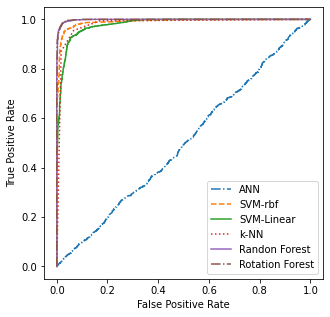

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# For ANN
nn_probs = mlp.predict_proba(X_test_pca)
nn_probs = nn_probs[:,1]  #taking only positive probs
nn_auc = roc_auc_score(y_test1, nn_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test1, nn_probs)
plt.plot(nn_fpr, nn_tpr, linestyle='-.', label='ANN')

# For SVM-rbf
rbf_probs = clf_rbf.predict_proba(X_test)
rbf_probs = rbf_probs[:,1]
rbf_auc = roc_auc_score(y_test,rbf_probs)
rbf_fpr, rbf_tpr, _ = roc_curve(y_test, rbf_probs)
plt.plot(rbf_fpr, rbf_tpr, linestyle='--', label='SVM-rbf')

# For SVM-linear
svm_probs = clf.predict_proba(X_test)
svm_probs = svm_probs[:,1]
svm_auc = roc_auc_score(y_test,svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM-Linear')

# For kNN
knn_probs = knn_model.predict_proba(X_test)
knn_probs = knn_probs[:,1]
knn_auc = roc_auc_score(y_test,knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='k-NN')

# For Randon Forest
rf_probs = rf_model.predict_proba(X_test)
rf_probs = rf_probs[:,1]
rf_auc = roc_auc_score(y_test,rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Randon Forest')

# For Rotation Forest
rotf_probs = rotf_model.predict_proba(X_test)
rotf_probs = rotf_probs[:,1]
rotf_auc = roc_auc_score(y_test,rotf_probs)
rotf_fpr, rotf_tpr, _ = roc_curve(y_test, rotf_probs)
plt.plot(rotf_fpr, rotf_tpr, linestyle='-.', label='Rotation Forest')

print('---------------------------- AUC SCORES ----------------------------------------------')
print('k-NN = %.3f' % (knn_auc))
print('ANN = %.3f' % (nn_auc))
print('SVM - rbf kernel = %.3f' % (rbf_auc))
print('SVM - linear kernel = %.3f' % (svm_auc))
print('Random Forest = %.3f' % (rf_auc))
print('Rotation Forest = %.3f' % (rotf_auc))
print()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


reference links

1. https://matplotlib.org/2.0.2/api/lines_api.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
3. https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9
4. https://hub.packtpub.com/rotation-forest-classifier-ensemble-based-feature-extraction/
5. https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap#:~:text=heatmap()%20function%20has%20two,yticklabels%20for%20y%2Daxis%20labels.&text=Now%2C%20we%20are%20changing%20x,heatmap()%20parameters.&text=for%20in%20depth%20explanation%20follow%20seaborn%20heatmap%20tutorial.
6. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9